### Importing Relevant Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [3]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')



### Removing Surplus Data

In [5]:
df_comp['market_value']=df_comp.spx

In [6]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [9]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df)) #wn = white noise , this will create an array of random variables [x1,x2,...xn] from a normal distribution X~n(mean,standard_daviation)

In [8]:
df['wn'] = wn

C:\Users\Tech Land\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1092.861045
std,292.559287,293.182866
min,438.920000,109.634533
25%,914.620000,894.949121
50%,1144.650000,1096.555907
75%,1316.280729,1292.114234
max,1570.252238,2104.544399


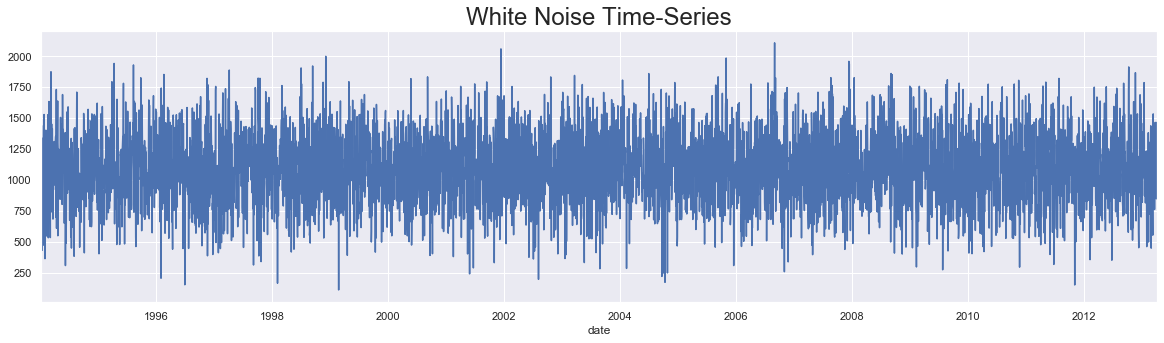

In [14]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

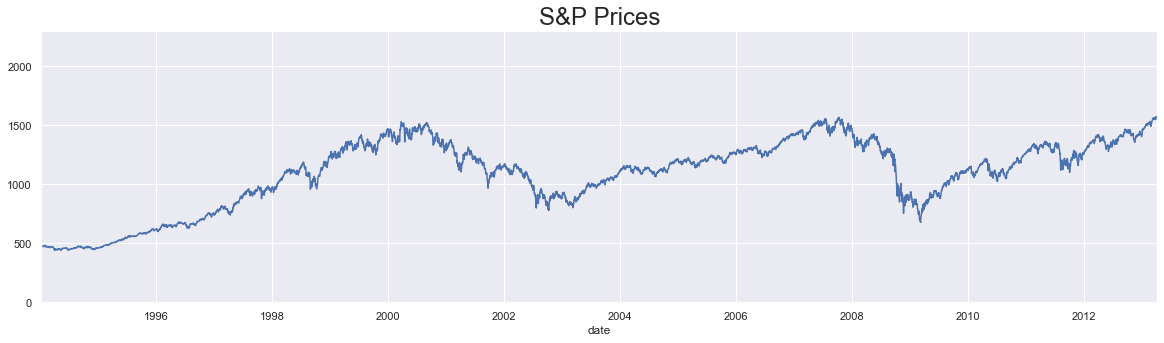

In [16]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300) # it sets the limit of the y axis
plt.show()

### Random Walk

In [21]:
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [22]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [23]:
df['rw'] = rw.price

C:\Users\Tech Land\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,930.970753,1122.139662
1994-01-10,475.27,1437.790372,1080.347860
1994-01-11,474.13,1277.052258,1082.095245
1994-01-12,474.17,1130.709957,1083.639265
1994-01-13,472.47,429.788184,1067.146255


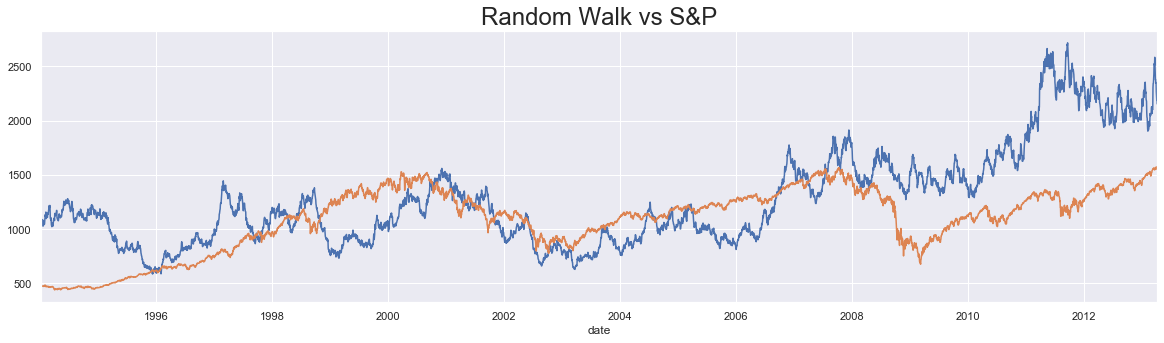

In [25]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

### Stationarity

In [18]:
sts.adfuller(df.market_value) #checking market_value time is stationary or not ..2nd value -0.4121.. be the probability that this data may have 40% possibility not to be stationary, 18be the lag,last value ta chuto hole stationary howar possibility besi

(-1.7369847452352438,
 0.4121645696770621,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [19]:
sts.adfuller(df.wn) #white noise is a stationary

(-48.38717893820491,
 0.0,
 1,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 70820.67664150592)

In [26]:
sts.adfuller(df.rw) #Augmented Dickey-Fuller test

(-1.328607392768972,
 0.6159849181617384,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonality

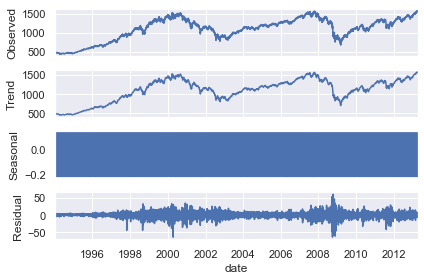

In [29]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()


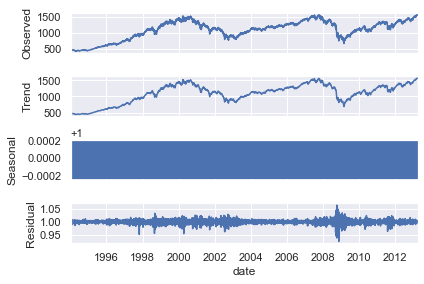

In [30]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show() # plot shows there is no seasonalities in s&p data

### ACF

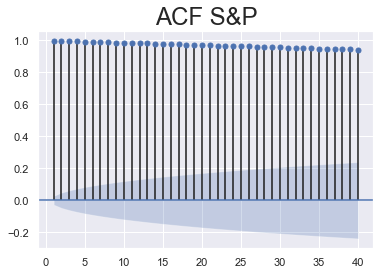

In [36]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

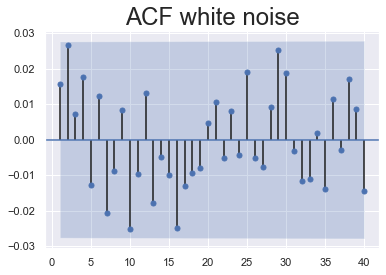

In [37]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF white noise", size = 24)
plt.show()

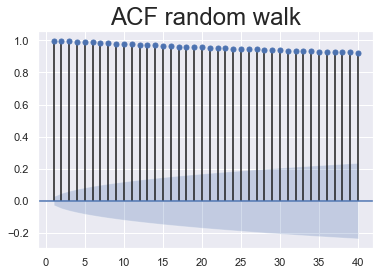

In [38]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF random walk", size = 24)
plt.show()

### PACF(partial Autocorrelation Finction)

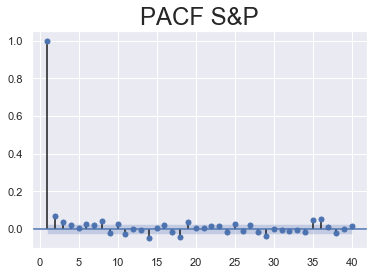

In [33]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))#ols = order of least square
plt.title("PACF S&P", size = 24)
plt.show()

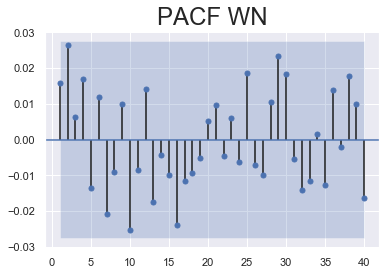

In [39]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()